In [23]:
# setup
!wget -q https://github.com/DM-GY-9103-2024F-H/9103-utils/raw/main/src/data_utils.py
!wget -q https://github.com/DM-GY-9103-2024F-H/9103-utils/raw/main/src/image_utils.py

description

this notebook documents the attempts and errors to train a regression model with input image pixels, and the final running code that selects pixels from input image pixels to make a new random image


milestone 1

i chose idea 2 from milestone 1, downloaded a bunch of images from pantone website, and purposely label them in a certain order with dominant colors i identified with my eyes

scroll down for milestone 2 for the working code!

In [24]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import random

from os import listdir, path
from data_utils import LinearRegression, RandomForestClassifier

from PIL import Image

from image_utils import make_image, open_image

IMAGE_PATH = "./imgs"

milestone 2 - part 1

load images to get pixel data. scroll down for part 2!! some codes in between are no longer in use

In [25]:
# load images
img_files = [f for f in listdir(IMAGE_PATH) if f.endswith("jpeg")]

img_objects = []
for fname in img_files:
  img_objects.append(open_image(path.join(IMAGE_PATH, fname)))

In [6]:
# check image list
print(img_objects[:2])

# resize for consistency
# regression model kills the kernel so im downsizing the images even more
#new_size = (128, 128)
new_size = (64,64)
img_resized = []
for img in img_objects:
    resized = img.resize(new_size)
    img_resized.append(resized)

# check resized image list
print(img_resized[:2])

[<PIL.Image.Image image mode=RGB size=1280x350 at 0x7A8DD0B3D1F0>, <PIL.Image.Image image mode=RGB size=1920x837 at 0x7A8E04273800>]
[<PIL.Image.Image image mode=RGB size=64x64 at 0x7A8DD0AFD130>, <PIL.Image.Image image mode=RGB size=64x64 at 0x7A8DD01D7290>]


In [7]:
# get pixels and put into dataframe
img_pixels = []
for img in img_resized:
    img_pixels.append(img.pixels)

# check
print(img_pixels[0][:3])

[(229, 95, 135), (230, 95, 135), (230, 95, 135)]


In [8]:
# pixels with labels
img_pixels_labels = []
for img in img_resized:
    pixels_dic = {}
    for i,(r,g,b) in enumerate(img.pixels):
        pixels_dic[f"R{i}"] = r
        pixels_dic[f"G{i}"] = g
        pixels_dic[f"B{i}"] = b
        #img_pixels_labels.append({"R": r, "G": g, "B": b})
    img_pixels_labels.append(pixels_dic)

# create a list for the feature to be predicted
# downsizing the images gives less blue channels
#drop_col = [f"B{i}" for i in range(128 * 128)]
drop_col = [f"B{i}" for i in range(64 * 64)]

# check
#print(len(img_pixels_labels[0]))

# dataframe
rgb_df = pd.DataFrame(img_pixels_labels)
display(rgb_df)

,R0,G0,B0,R1,G1,B1,R2,G2,B2,R3,...,B4092,R4093,G4093,B4093,R4094,G4094,B4094,R4095,G4095,B4095
0,229,95,135,230,95,135,230,95,135,230,...,133,230,99,133,230,99,133,230,99,133
1,103,11,71,145,29,100,117,20,79,65,...,229,251,208,228,252,204,226,251,197,221
2,8,1,9,12,0,12,12,0,12,12,...,64,91,1,57,82,1,50,71,0,44
3,39,26,22,39,30,23,39,23,21,28,...,27,86,48,24,64,37,20,34,26,18
4,152,194,236,154,196,237,154,196,238,153,...,76,75,83,43,74,78,42,55,57,32
5,253,211,186,253,212,188,254,212,188,254,...,170,243,193,169,242,194,169,242,193,167
6,56,112,118,59,117,123,61,121,129,64,...,47,162,53,41,145,46,35,122,37,27
7,10,10,9,117,116,103,191,189,167,197,...,105,152,133,102,93,80,61,8,7,5
8,254,242,236,253,244,239,253,247,242,253,...,59,158,89,55,135,73,38,131,76,41
9,37,9,34,35,8,33,31,7,31,28,...,193,188,168,157,164,145,139,156,135,130


In [7]:
"""
## pixels with labels
img_pixels_labels_2 = {"R":[], "G":[], "B":[]}
for img in img_resized:
    for r,g,b in img.pixels:
        img_pixels_labels_2["R"].append(r)
        img_pixels_labels_2["G"].append(g)
        img_pixels_labels_2["B"].append(b)

## dataframe
rgb_df_2 = pd.DataFrame(img_pixels_labels_2)
display(rgb_df_2.head)
"""

'\n## pixels with labels\nimg_pixels_labels_2 = {"R":[], "G":[], "B":[]}\nfor img in img_resized:\n    for r,g,b in img.pixels:\n        img_pixels_labels_2["R"].append(r)\n        img_pixels_labels_2["G"].append(g)\n        img_pixels_labels_2["B"].append(b)\n\n## dataframe\nrgb_df_2 = pd.DataFrame(img_pixels_labels_2)\ndisplay(rgb_df_2.head)\n'

In [8]:
"""
# columns
features = rgb_df_2.drop(columns=["G"])
out_feature = rgb_df_2["G"]

# regression
model = LinearRegression()
model.fit(features, out_feature)

# prediction
prediction_r = model.predict(features)

# regression error
regression_error(rgb_df_2["G"], prediction_r["G"])
"""

'\n# columns\nfeatures = rgb_df_2.drop(columns=["G"])\nout_feature = rgb_df_2["G"]\n\n# regression\nmodel = LinearRegression()\nmodel.fit(features, out_feature)\n\n# prediction\nprediction_r = model.predict(features)\n\n# regression error\nregression_error(rgb_df_2["G"], prediction_r["G"])\n'

In [9]:
# separate features
features = rgb_df.drop(columns=drop_col)
out_feature = rgb_df[drop_col]

# check if features are separated successfully
display(features.shape)
display(out_feature.shape) # this looks just right but model.predict just crashes with shape mismatch

# model + fit
# kernel keeps crashing here for unknown reasons so im resizing images to train with less data
model = LinearRegression()
model.fit(features, out_feature)

(31, 8192)

(31, 4096)

In [ ]:
# run prediction
# prediction on training data keeps crashing with a shape mismatch saying the output expects (31,1)
# but i made sure out_feature has a shape of (31, 4096)
# b_predict = model.predict(features)

# so im trying to run in on a new set of random data to see if the model runs
# create a new dataframe of r and g features
"""
random_test_features = []
for i in range(31):
    test_r_g = {}
    for j in range(4096):
        test_r_g[f"R{j}"] = random.randint(0,256)
        test_r_g[f"G{j}"] = random.randint(0,256)
    random_test_features.append(test_r_g)

# put into dataframe and check shape
random_test_df = pd.DataFrame(random_test_features)
random_test_df.shape

# run the prediction model on this random feature df
b_prediction = model.predict(random_test_df)
"""
# error still occurs as displayed and i really cant figure out why... the output feature to fit the model has the correct shape

ValueError: Shape of passed values is (31, 4096), indices imply (31, 1)

In [ ]:
rgb_df[drop_col] = len(drop_col) * [0]
rgb_df

milestone 2 - part 2

resize all the input images and extract pixel data from the resized images. see comments in code cell for detail



milestone 3

dataframing to interpret channels more easily with labels. see comments in later half of code cell for detail

In [28]:
# in order to submit a complete project for grading, even though i cannot achieve what i planned
# i will do the simple version of picking random pixels for a new image
# i will use the 128x128 images instead of 64x64 for more possibilities

# the last 128x128 resize was commented out, but i want to save the process
# this resized image list has a different name
resized_img = []
new_size = (128,128)
for img in img_objects:
    resized = img.resize(new_size)
    resized_img.append(resized)

# check
print(len(resized_img))
print(resized_img[:2])

# list of rgb pixels
pxls_labels = []
for img in resized_img:
    pixels_dic = {}
    for i,(r,g,b) in enumerate(img.pixels):
        pixels_dic[f"R{i}"] = r
        pixels_dic[f"G{i}"] = g
        pixels_dic[f"B{i}"] = b
    pxls_labels.append(pixels_dic)

# df it because why not, also just want to include more formats than just the list in the project
# might seem unneccesary though, but making images is already boring, this could bring some fun
img_df = pd.DataFrame(pxls_labels)
img_df

31
[<PIL.Image.Image image mode=RGB size=128x128 at 0x7A8D8B274D10>, <PIL.Image.Image image mode=RGB size=128x128 at 0x7A8D8B275190>]


,R0,G0,B0,R1,G1,B1,R2,G2,B2,R3,...,B16380,R16381,G16381,B16381,R16382,G16382,B16382,R16383,G16383,B16383
0,230,95,135,228,96,135,230,95,135,230,...,133,230,99,133,230,99,133,230,99,133
1,95,7,65,106,13,74,123,21,85,160,...,227,251,204,225,252,201,223,251,194,222
2,7,1,10,8,1,9,12,0,11,12,...,52,80,1,49,74,0,46,68,0,43
3,33,26,20,48,27,26,32,28,21,35,...,23,45,28,13,29,25,15,30,25,19
4,152,192,236,152,195,238,154,196,238,154,...,41,87,92,50,70,73,39,56,59,32
5,251,210,185,252,212,187,252,211,187,253,...,166,243,193,167,243,193,167,241,191,168
6,55,111,118,57,114,118,59,116,120,60,...,35,141,44,32,131,42,31,106,27,19
7,0,0,0,0,0,0,11,11,9,89,...,47,10,7,6,0,0,0,0,0,0
8,252,243,239,254,242,234,253,243,238,253,...,40,128,71,39,133,77,40,133,78,43
9,37,9,34,37,9,34,36,9,34,33,...,144,163,144,138,158,137,132,154,132,127


In [31]:
# all channels
r_channels = [f"R{i}" for i in range(128 * 128)]
g_channels = [f"G{i}" for i in range(128 * 128)]
b_channels = [f"B{i}" for i in range(128 * 128)]

#color_channels = [r_channels, g_channels, b_channels]

print(len(r_channels))

16384


milestone 5

-the working code did not include a model so there is no milestone 4 for the final product. see separate milestone 4 file on main for the failure version with linear regression-

INTRO

this project takes image inputs, transforms pixels into dataframe and performs a random selection of pixels on each channel of RGB to create a new random images. the dataframe works to better label channels and locate the random pixel selection

PROCESS

see comments in code cells.. i didnt check milestone requirements before writing the codes and the comments, but all the explanations are in the comments near the codes where things happen

FURTHER STEP - CURRENT PROJECT

i wish the regression would work even though logically it means nothing(could be the reason why model fails, but the shape IS correct!! i really cant figure out the real issue). with the working codes, there are chances to explore clustering and filtering. 

FURTHER STEP - NEXT SEMESTER

i registered for the deep learning class next semester. didnt bring it up earlier in class was because i wasnt too sure if i'd end up swapping it with another class. now that i've decided to stick to it im really looking forward for more machine learning


CONCLUSION

i think one important thing is to stick to the true applications of models or algorithms and not expect them to do anything that has no scientific logic while my ability is at the early stage, like just feed the regression model with data that shows a trend of regression instead of giving it messy training data like image pixels. 

another thing is that i didnt include much content from later half of the semester even with the regression idea. exploring those would be another step i take. but since i struggled more with coding assignments from those weeks, i would probably consider a project with more practices of my understanding and knowledge.

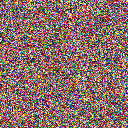

In [42]:
# new image place holder
new_img = Image.new("RGB", (128,128))
new_img_pxl = []

# select random pixels
for i in range(128 * 128):

    # randomly selected a source image(row) and one of the rgb channels of that image
    selected_r = random.choice(r_channels)
    selected_g = random.choice(g_channels)
    selected_b = random.choice(b_channels)
    selected_source = img_df.sample()

    # get the corresponding pixel on that location
    r = selected_source[selected_r].values[0]
    g = selected_source[selected_g].values[0]
    b = selected_source[selected_b].values[0]

    # append
    new_img_pxl.append((r,g,b))

# display
# each run of this cell will return a different result
# even though they all look kinda the same
new_img.putdata(new_img_pxl)
display(new_img)